In [1]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector
from itertools import product

Base computacional: |11>


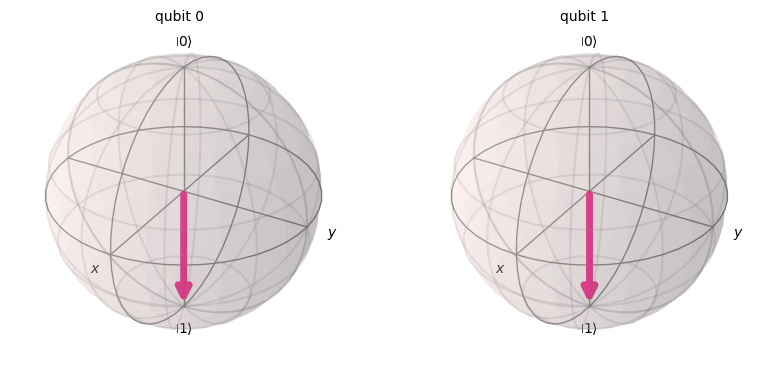

Base de Fourier: |11>


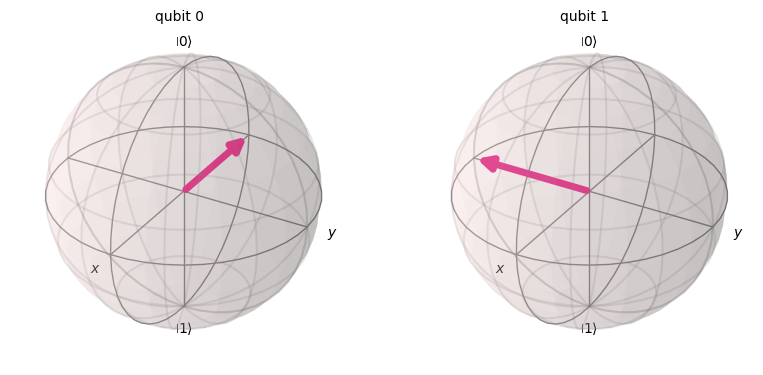

In [41]:
state = '11'
rev_state = state[::-1]

qc = QuantumCircuit(len(rev_state))
qc.initialize(Statevector.from_label(state), qc.qubits[::-1])
print(f"Base computacional: |{state}>")
display(plot_bloch_multivector(Statevector.from_label(rev_state).data))
print(f"Base de Fourier: |{state}>")
qc.append(QFT(len(rev_state), do_swaps=True) ,qc.qubits[::-1])
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

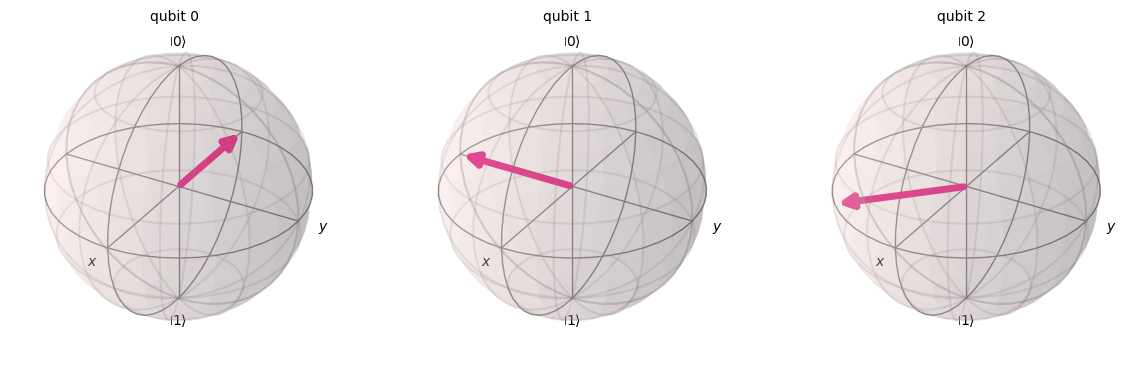

In [42]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Generar todas las combinaciones binarias de 4 bits
for state in product('01', repeat=3):
    state = ''.join(state)
    rev_state = state[::-1]

    # Circuito cuántico
    qc = QuantumCircuit(len(rev_state))
    qc.initialize(Statevector.from_label(state), qc.qubits[::-1])

    # Base computacional
    print(f"Base computacional: |{state}>")
    bloch_data = Statevector.from_label(rev_state).data
    clear_output(wait=True)  # Limpiar la salida previa
    display(plot_bloch_multivector(bloch_data))
    plt.pause(3)  # Pausa para visualizar la gráfica

    # Base de Fourier
    print(f"Base de Fourier: |{state}>")
    qc.append(QFT(len(rev_state), do_swaps=True), qc.qubits[::-1])
    bloch_data_fourier = Statevector.from_instruction(qc).data
    clear_output(wait=True)  # Limpiar la salida previa
    display(plot_bloch_multivector(bloch_data_fourier))
    plt.pause(3)  # Pausa para visualizar la gráfica

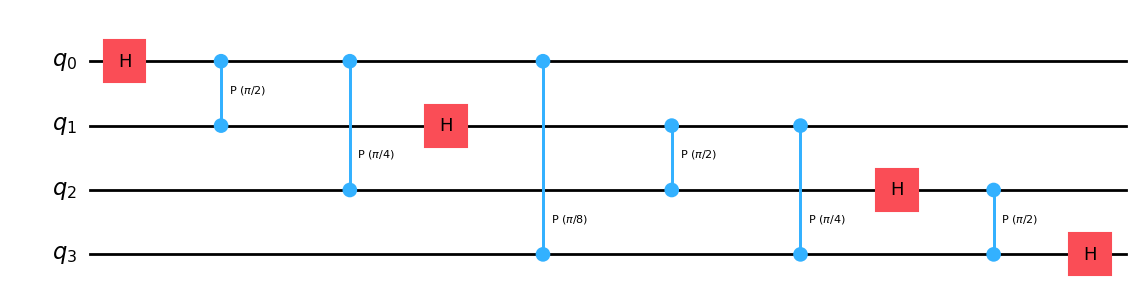

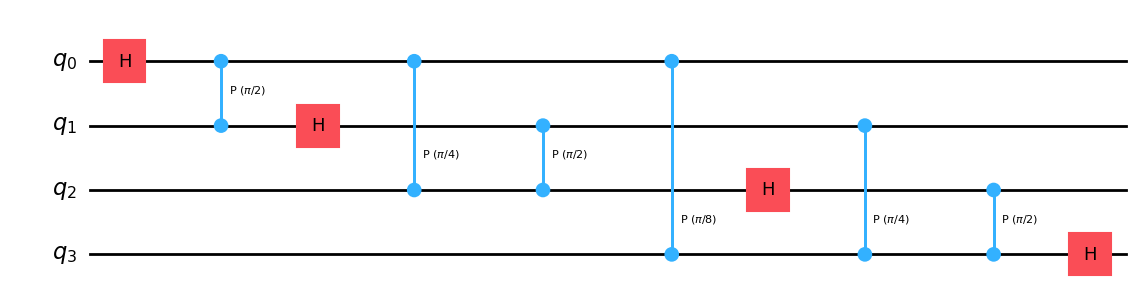

In [34]:
import numpy as np
pi = np.pi

def myQFT(nqubits):

    myQFT_circuit = QuantumCircuit(nqubits)

    for qubit in range(nqubits):
        myQFT_circuit.h(qubit)
        for otherqubit in range(qubit+1,nqubits):
            myQFT_circuit.cp(pi/(2**(otherqubit - qubit)), otherqubit, qubit)

    return myQFT_circuit

n_qubits = 4

# Circuito con la puerta QFT abstracta de Qiskit
qiskit_qft = QFT(n_qubits, do_swaps=False)

# Descomponer la puerta QFT de Qiskit
decomposed_qiskit_qft = qiskit_qft.decompose()

# Invertir el orden de los qubits para que coincida con tu implementación
inverted_circuit = QuantumCircuit(n_qubits)
qubits = reversed(range(n_qubits))
inverted_circuit.append(decomposed_qiskit_qft, qubits)  # Cambia el orden de qubits

# Mostrar los circuitos
display(myQFT(n_qubits).draw('mpl'))             # Circuito manual
display(inverted_circuit.decompose().draw('mpl'))     # Circuito QFT descompuesto con orden ajustado



Base computacional: |11>


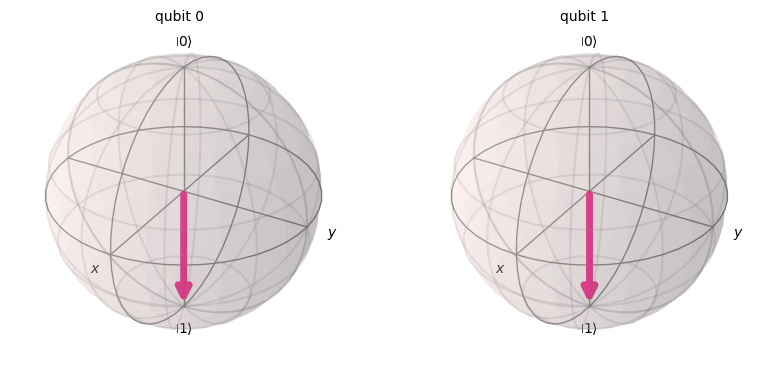

Base de Fourier: |11>


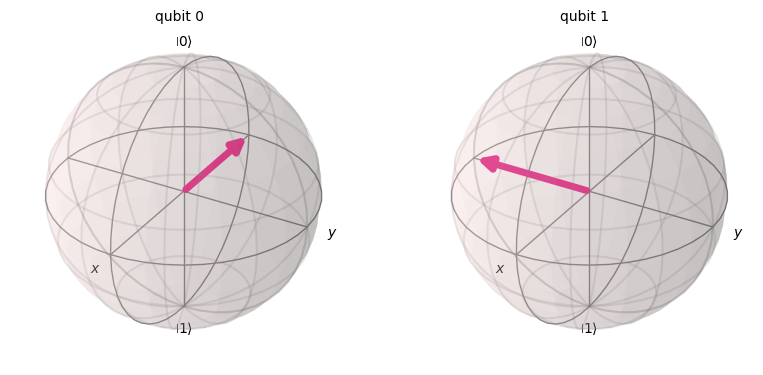

In [43]:
state = '11'
rev_state = state[::-1]

qc = QuantumCircuit(len(rev_state))
qc.initialize(Statevector.from_label(state), qc.qubits[::-1])
print(f"Base computacional: |{state}>")
display(plot_bloch_multivector(Statevector.from_label(rev_state).data))

# En este caso vamos a emplear nustra funcion de QFT
print(f"Base de Fourier: |{state}>")
qc.append(myQFT(len(rev_state)) ,qc.qubits[::-1])
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))